In [1375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1376]:
with open("./data/processed/areaharvestedVStime.pkl", "rb") as pfile:
    df_area_harvested = pickle.load(pfile)
    df_area_harvested_units = pickle.load(pfile)

with open("./data/processed/yeildVStime.pkl", "rb") as pfile:
    df_yeild = pickle.load(pfile)
    df_yeild_units = pickle.load(pfile)

with open("./data/processed/beesstockVStime.pkl", "rb") as pfile:
    df_bees_stock = pickle.load(pfile)
    df_bees_stock_units = pickle.load(pfile)

with open("./data/processed/honeyVStime.pkl", "rb") as pfile:
    df_honey_yeild = pickle.load(pfile)
    df_honey_yeild_units = pickle.load(pfile)

with open("./data/processed/pesticidesVStime.pkl", "rb") as pfile:
    df_pesticides = pickle.load(pfile)
    df_pesticides_units = pickle.load(pfile)

with open("./data/processed/emissionsVStime.pkl", "rb") as pfile:
    df_emissions = pickle.load(pfile)
    df_emissions_units = pickle.load(pfile)

RANDOM_STATE = 17

In [1377]:
print(df_area_harvested_units)
print(df_area_harvested.shape)
df_area_harvested.head()


{'Unit': 'ha'}
(60, 2)


,year,total_area_harvested
0,1961,142000.0
1,1962,137550.0
2,1963,130550.0
3,1964,125570.0
4,1965,121440.0


In [1378]:
print(df_yeild_units)
print(df_yeild.shape)
df_yeild.head()


{'Unit': 'hg/ha'}
(60, 2)


,year,total_yeild
0,1961,380916.0
1,1962,380175.0
2,1963,407726.0
3,1964,388518.0
4,1965,405348.0


In [1379]:
print(df_bees_stock_units)
print(df_bees_stock.shape)
df_bees_stock.head()


{'Unit': 'No'}
(60, 2)


,year,total_bees_stock
0,1961,5514000
1,1962,5506000
2,1963,5528000
3,1964,5601000
4,1965,4718000


In [1380]:
print(df_honey_yeild_units)
print(df_honey_yeild.shape)
df_honey_yeild.head()


{'Unit': 'No'}
(60, 4)


,year,total_honey_production,total_honey_colonies,total_yeild_per_colony
0,1961,105136.0,2639000.0,2944.0
1,1962,105136.0,2639000.0,2944.0
2,1963,105136.0,2639000.0,2944.0
3,1964,105136.0,2639000.0,2944.0
4,1965,105136.0,2639000.0,2944.0


In [1381]:
print(df_pesticides_units)
print(df_pesticides.shape)
df_pesticides.head()


{'Unit': 'tonnes'}
(60, 2)


,year,total_pesticides
0,1961,400975.93
1,1962,400975.93
2,1963,400975.93
3,1964,400975.93
4,1965,400975.93


In [1382]:
print(df_emissions_units)
print(df_emissions.shape)
df_emissions.head()


{'Unit': 'megatonnes'}
(60, 2)


,year,total_emissions
0,1961,670.691137
1,1962,687.495281
2,1963,705.308444
3,1964,715.356844
4,1965,719.030654


In [1383]:
# data aggregation

df_area_harvested
df_yeild
df_bees_stock
df_honey_yeild
df_pesticides
df_emissions

df_area = pd.DataFrame({
    'year': np.array(df_area_harvested['year']), 
    'bees_stock': np.array(df_bees_stock['total_bees_stock']),
    'honey_yeild': np.array(df_honey_yeild['total_honey_production']),
    'honey_colonies': np.array(df_honey_yeild['total_honey_colonies']),
    'pesticide_usage': np.array(df_pesticides['total_pesticides']),
    'emissions': np.array(df_emissions['total_emissions']),
    'area_harvested': np.array(df_area_harvested['total_area_harvested'])
})

df_yeild = pd.DataFrame({
    'year': np.array(df_yeild['year']), 
    'bees_stock': np.array(df_bees_stock['total_bees_stock']),
    'honey_yeild': np.array(df_honey_yeild['total_honey_production']),
    'honey_colonies': np.array(df_honey_yeild['total_honey_colonies']),
    'pesticide_usage': np.array(df_pesticides['total_pesticides']),
    'emissions': np.array(df_emissions['total_emissions']),
    'yeild': np.array(df_yeild['total_yeild'])
})

df_area

,year,bees_stock,honey_yeild,honey_colonies,pesticide_usage,emissions,area_harvested
0,1961,5514000,105136.0,2639000.0,400975.93,670.691137,142000.0
1,1962,5506000,105136.0,2639000.0,400975.93,687.495281,137550.0
2,1963,5528000,105136.0,2639000.0,400975.93,705.308444,130550.0
3,1964,5601000,105136.0,2639000.0,400975.93,715.356844,125570.0
4,1965,4718000,105136.0,2639000.0,400975.93,719.030654,121440.0
5,1966,4646000,105136.0,2639000.0,400975.93,717.083463,118250.0
6,1967,4635000,105136.0,2639000.0,400975.93,728.304944,114240.0
7,1968,4539000,105136.0,2639000.0,400975.93,732.883062,114080.0
8,1969,4433000,105136.0,2639000.0,400975.93,734.984595,110600.0
9,1970,4634000,105136.0,2639000.0,400975.93,741.759555,103840.0


In [1384]:
# df_area = df_area.loc[df_area['year'] >= 1995]
# df_area = df_area.reset_index(drop=True)
# df_area

In [1385]:
# df_yeild
# df_yeild = df_yeild.loc[df_yeild['year'] >= 1995]
# df_yeild = df_yeild.reset_index(drop=True)
# df_yeild

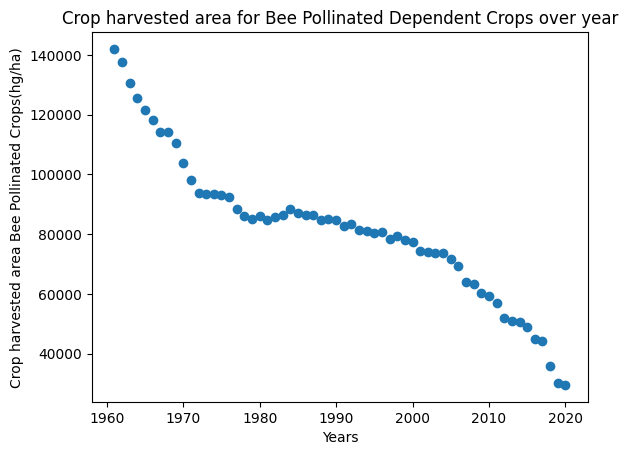

In [1386]:
plt.title("Crop harvested area for Bee Pollinated Dependent Crops over year")
plt.xlabel("Years")
plt.ylabel("Crop harvested area Bee Pollinated Crops(hg/ha)")
# plt.scatter(range(0,df_area.shape[0]),df_area['area_harvested'])
plt.scatter(df_area['year'],df_area['area_harvested'])

plt.savefig('crop_harvested_area_bee_pollinated_analysis.png')
plt.show()


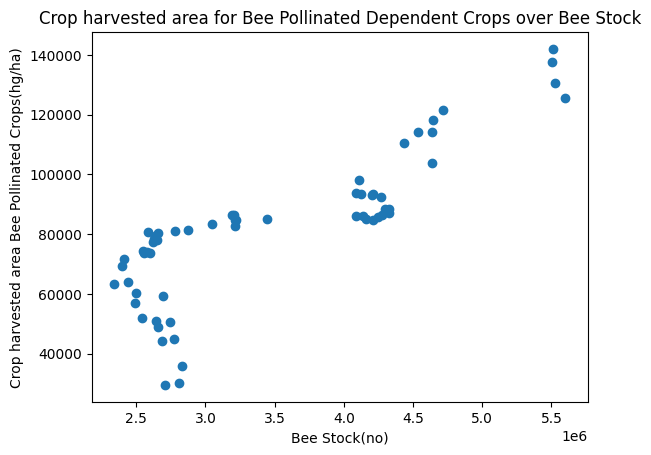

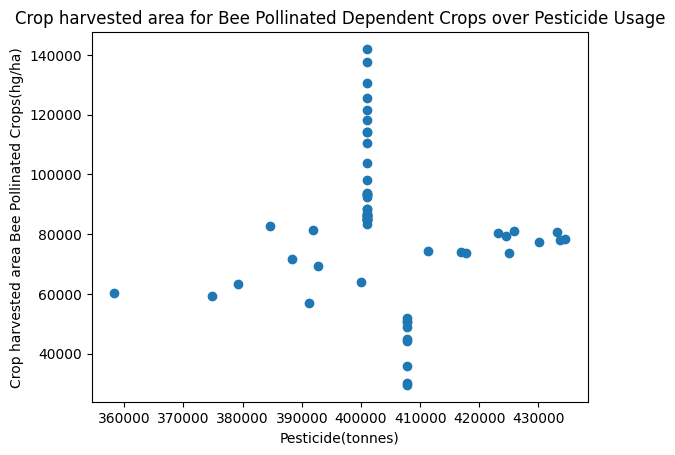

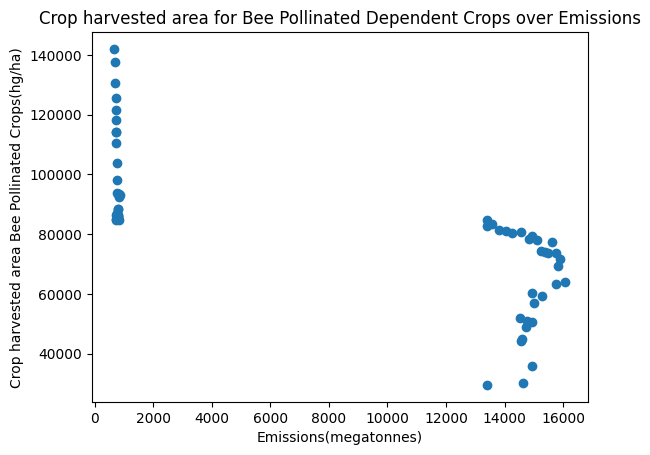

In [1387]:
# X = df_area[[ 'bees_stock', 'honey_yeild', 'honey_colonies', 'pesticide_usage', 'emissions']]
# Y = df_area[ 'area_harvested' ]

plt.title("Crop harvested area for Bee Pollinated Dependent Crops over Bee Stock")
plt.xlabel("Bee Stock(no)")
plt.ylabel("Crop harvested area Bee Pollinated Crops(hg/ha)")
plt.scatter(df_area['bees_stock'],df_area['area_harvested'])
plt.savefig('crop_harvested_area_bee_pollinated_analysis_bee_stock.png')
plt.show()

# plt.title("Crop harvested area for Bee Pollinated Dependent Crops over Honey Yeild")
# plt.xlabel("Honey Yeild(tonnes)")
# plt.ylabel("Crop harvested area Bee Pollinated Crops(hg/ha)")
# plt.scatter(df_area['honey_yeild'],df_area['area_harvested'])
# plt.savefig('crop_harvested_area_bee_pollinated_analysis_honey_yeild.png')
# plt.show()

# plt.title("Crop harvested area for Bee Pollinated Dependent Crops over Bee Colonies Number")
# plt.xlabel("Bee Colonies(no)")
# plt.ylabel("Crop harvested area Bee Pollinated Crops(hg/ha)")
# plt.scatter(df_area['honey_colonies'],df_area['area_harvested'])
# plt.savefig('crop_harvested_area_bee_pollinated_analysis_bee_colonies.png')
# plt.show()

plt.title("Crop harvested area for Bee Pollinated Dependent Crops over Pesticide Usage")
plt.xlabel("Pesticide(tonnes)")
plt.ylabel("Crop harvested area Bee Pollinated Crops(hg/ha)")
plt.scatter(df_area['pesticide_usage'],df_area['area_harvested'])
plt.savefig('crop_harvested_area_bee_pollinated_analysis_pesticide.png')
plt.show()

plt.title("Crop harvested area for Bee Pollinated Dependent Crops over Emissions")
plt.xlabel("Emissions(megatonnes)")
plt.ylabel("Crop harvested area Bee Pollinated Crops(hg/ha)")
plt.scatter(df_area['emissions'],df_area['area_harvested'])
plt.savefig('crop_harvested_area_bee_pollinated_analysis_emissions.png')
plt.show()

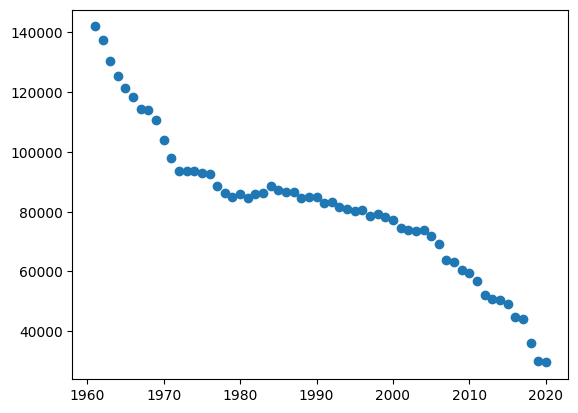

In [1388]:
plt.scatter(df_area['year'],df_area['area_harvested'])
plt.show()

In [1389]:


# X = df_area[[ 'bees_stock', 'honey_yeild', 'honey_colonies', 'pesticide_usage', 'emissions']]
# X = df_area[[ 'bees_stock', 'honey_colonies', 'pesticide_usage', 'emissions']]
Y = df_area[ 'area_harvested' ]

X = df_area[[ 'bees_stock', 'pesticide_usage', 'emissions']]
Y = df_area[ 'area_harvested' ]

# standardising data
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=RANDOM_STATE)


In [1390]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)



LinearRegression()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


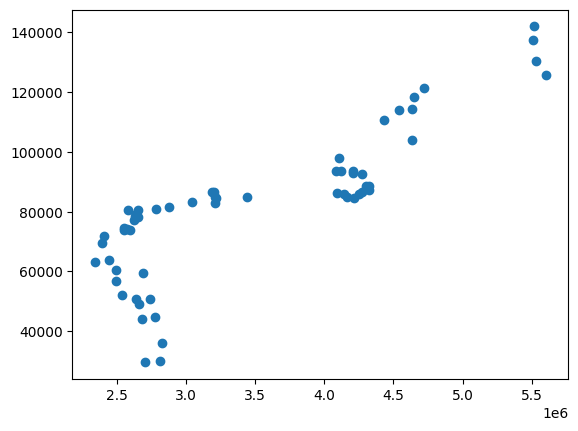

In [1391]:
# x1 = X.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
# y1 = Y.iloc[:, 1].values.reshape(-1, 1)

predictions = lin_reg.predict(X)

plt.scatter(X[['bees_stock']], Y)
# plt.plot(X[['bees_stock']], predictions, color='red')
plt.show()

In [1392]:
lin_reg.coef_

array([20842.38328466,  2298.50469632,  1103.55117426])

In [1393]:
lin_reg.intercept_

82936.78604537967

In [1394]:
R2 = lin_reg.score(X_train, Y_train)
print(f"R2 = {R2:f}")

R2 = 0.696569


In [1395]:
R2 = lin_reg.score(X_test, Y_test)
print(f"R2 = {R2:f}")

R2 = 0.702311


In [1396]:
predictions = lin_reg.predict(X_test)
residual = Y_test - predictions

In [1397]:
Y_train

23     88540.0
36     78430.0
53     50602.0
43     73738.0
26     86480.0
14     92950.0
57     35900.0
11     93720.0
37     79240.0
29     84800.0
8     110600.0
35     80670.0
18     85020.0
19     86030.0
42     73665.0
24     87210.0
13     93480.0
25     86520.0
52     50784.0
12     93520.0
2     130550.0
5     118250.0
32     81480.0
59     29542.0
30     82840.0
38     78078.0
27     84630.0
56     44090.0
3     125570.0
34     80380.0
10     97970.0
41     73997.0
17     86120.0
1     137550.0
7     114080.0
44     71844.0
20     84700.0
39     77249.0
4     121440.0
31     83320.0
55     44870.0
45     69347.0
48     60351.0
22     86400.0
6     114240.0
15     92550.0
49     59461.0
47     63252.0
Name: area_harvested, dtype: float64

In [1398]:
lin_reg.predict(X_train)

array([ 99285.07055558,  70738.58874512,  68492.45516261,  67542.30682891,
        74946.84482336,  97232.94338133,  70419.52063562,  94569.53120609,
        69151.31296209,  77372.88257351, 102190.59375273,  69362.37667421,
        96280.94040176,  95801.03691549,  67225.45593328,  99829.67445455,
        97316.20463091,  75278.53282817,  66275.17287744,  95427.6971137 ,
       126184.55291437, 106856.01197251,  68518.6639916 ,  67507.10081179,
        74556.03400809,  71087.19121106,  75581.03732557,  67206.11215191,
       127786.03412463,  69204.00104776,  95050.4502076 ,  66499.08140467,
        94682.34320918, 125699.59877258, 104513.4174572 ,  57998.64374007,
        97381.71458603,  69874.60188162, 108434.30763678,  73783.89182576,
        69206.59753073,  58445.27110636,  54595.3891246 ,  98734.16078097,
       106616.68785065,  98611.14663187,  61765.64111338,  54931.1731242 ])

In [1399]:

lst=list(zip(predictions,Y_test))
predictions
tmp=pd.DataFrame(lst,columns=['pred','y'])
tmp
tmp['difference']=abs(abs(tmp['pred'])-abs((tmp['y'])))
tmp['percentage error']=0
for i in range(len(tmp['difference'])):
    if tmp['y'][i]==0:
        tmp['percentage error'][i]=0
    else:
        tmp['percentage error'][i]=(tmp['difference'][i]/tmp['y'][i])*100
print('Average Percentage error:')
print(sum(tmp['percentage error'])/len(tmp['percentage error']))

Average Percentage error:
22.698167251538038


/var/folders/bv/f1r251ld0278_yb2rfwj99qw0000gn/T/ipykernel_78110/3812971536.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['percentage error'][i]=(tmp['difference'][i]/tmp['y'][i])*100


In [1400]:
lin_reg.coef_

array([20842.38328466,  2298.50469632,  1103.55117426])

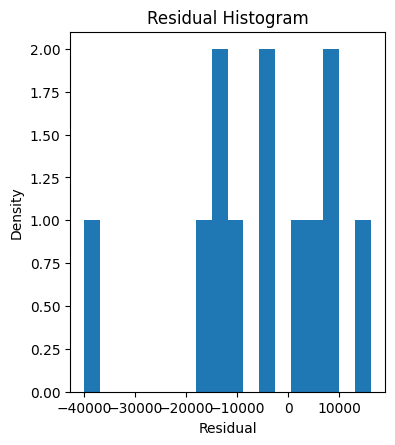

In [1401]:
fig1 = plt.figure(1, (4.5, 4.5))
ax1 = fig1.add_axes([0.2, 0.12, 0.7, 0.8])
ax1.hist(residual, bins=18)
ax1.set_xlabel("Residual")
# ax1.xaxis.set_major_formatter(lambda x, pos: f"${x/1000:.0f}K")
ax1.set_ylabel("Density")
ax1.set_title("Residual Histogram")
fig1.savefig("res_hist.png")

In [1402]:
from scipy.stats import kstest, norm

from scipy.stats import pearsonr
from sklearn.metrics import r2_score

# Calculate r-squared
r2 = r2_score(Y_test, predictions)
print('R-Squared:', r2)


corr = pearsonr(Y_test, predictions)
print('Pearson Correlation:', corr)
# Output: 0.992


result = kstest(residual, norm.cdf)
print(f"Kolmogorov-Smirnov: P-value = {result.pvalue}")
if (result.pvalue < 0.05):
    print(f"\tThe residual follows a normal distribution.")
else:
    print(f"\The residual does not follow a normal distribution.")

R-Squared: 0.7023108590613963
Pearson Correlation: PearsonRResult(statistic=0.8652908334501762, pvalue=0.0002774294203281232)
Kolmogorov-Smirnov: P-value = 0.0002075902628892023
	The residual follows a normal distribution.
